# Evaluation of experiments
fistly define the UUID of the experiment to use

In [222]:
experimentId="caa5287c-cb07-47ff-aba6-9c26eb22c40d"

-------------------------------------------------------

In [223]:
#external libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as clt
import plotly
import plotly.subplots as sb
import plotly.express as px
import plotly.graph_objects as go
import dotenv
import pandas as pd
import scipy.fft as fft
import scipy.signal as sg
import scipy.io as sio
import pickle as pkl
import xgboost as xgb
import time
import sklearn.metrics as skm

#project library
from spinco import *

#environment variables
dotenv.load_dotenv('lab.env')

#project variables
datapath=os.environ['DATAPATH']
cognipath=datapath+"\\COGNITION"
dreamspath=datapath+"\\DREAMS"
masspath=datapath+"\\MASS"


## load mass

In [224]:
samplerate=200  #Should rethink this

In [225]:
annotations, signalsMetadata = loadMASSSpindles(masspath,forceSamplerate=samplerate)

In [226]:
annotations.head()

,type,expert,subjectId,labelerId,startTime,duration,samplerate,stopTime,startInd,stopInd
0,kcomplex,E1,0001,0001,830.596676,0.699174,200,831.295850,166119,166259
1,kcomplex,E1,0001,0001,840.981316,0.492156,200,841.473472,168196,168295
2,kcomplex,E1,0001,0001,970.596678,0.578088,200,971.174766,194119,194235
3,kcomplex,E1,0001,0001,1049.772807,0.695268,200,1050.468075,209955,210094
4,kcomplex,E1,0001,0001,1077.231575,0.648396,200,1077.879971,215446,215576


In [227]:
signalsMetadata.head()

,subjectId,file,channel,duration,samplerate,isOriginalSamplerate,database
0,0001,MASS_0001.pkl,C3-CLE,28956.0,200,False,MASS
1,0002,MASS_0002.pkl,C3-CLE,35016.0,200,False,MASS
2,0003,MASS_0003.pkl,C3-CLE,36760.0,200,False,MASS
3,0004,MASS_0004.pkl,C3-CLE,28004.0,200,False,MASS
4,0005,MASS_0005.pkl,C3-CLE,31244.0,200,False,MASS


## Load experiment results

In [228]:
def loadModel(modelId,experimentId,datapath):
    model=xgb.XGBClassifier()
    model.load_model(datapath+"/experiments/"+experimentId+"/"+modelId+".json")
    return model

In [229]:
def loadExperiment(experimentId,datapath):
    experimentModels=loadPickle(datapath+"/experiments/"+experimentId+"/experimentModels.pkl")
    featureSelection=loadPickle(datapath+"/experiments/"+experimentId+"/featureSelection.pkl")
    return experimentModels, featureSelection

In [230]:
experimentModels, featureSelection = loadExperiment(experimentId,datapath)

In [231]:
experimentModels

,train,val,test,modelId,treeLimit,valF1
0,"[0002, 0003, 0004, 0005, 0007, 0008, 0009, 001...","[0006, 0014]",[0001],dfe10db6-0f32-4bce-acc2-f7182342d975,29,0.624040
1,"[0001, 0003, 0004, 0005, 0006, 0007, 0008, 000...","[0012, 0010]",[0002],a9db02e2-0d19-4cb2-8d0f-e403b4d1b817,31,0.560143
2,"[0002, 0004, 0005, 0006, 0007, 0008, 0009, 001...","[0001, 0012]",[0003],41a7a7ab-da20-48bb-9303-f7d8007b8a6e,40,0.373273
3,"[0001, 0003, 0005, 0006, 0008, 0009, 0010, 001...","[0002, 0007]",[0004],ab7f2287-b2cd-4566-bf38-be15170b98b9,31,0.617306
4,"[0001, 0002, 0003, 0004, 0006, 0007, 0008, 000...","[0011, 0016]",[0005],627ce16b-abc2-4ddc-a3d0-66d2fdd180de,29,0.640402
5,"[0001, 0002, 0003, 0004, 0005, 0007, 0008, 000...","[0011, 0016]",[0006],b01595be-85b5-4126-b4e2-151196a40974,33,0.639887
6,"[0001, 0002, 0003, 0004, 0005, 0006, 0008, 000...","[0010, 0018]",[0007],1238a54b-ecc1-4241-8048-39e95efd0470,24,0.589239
7,"[0001, 0002, 0003, 0004, 0005, 0007, 0009, 001...","[0015, 0006]",[0008],f6994485-50f9-4be9-9122-f7c45f2626d8,28,0.436195
8,"[0001, 0002, 0003, 0004, 0006, 0008, 0010, 001...","[0005, 0007]",[0009],d080e719-2c7b-453c-921f-84d45d827dd0,32,0.593563
9,"[0001, 0002, 0003, 0004, 0005, 0006, 0007, 000...","[0011, 0009]",[0010],de6a9e0d-8a5b-4e8e-8fb2-10a2e7ae9f16,37,0.564571


In [11]:
featureSelection

,characteristic,bandName,window
21,hjortActivity,sigma,0.5
66,petrosian,broadband,0.5
22,hjortActivity,theta,0.5
79,relativePower,beta1,0.5
29,hjortComplexity,sigma,0.5


## Annotation criterium

In [12]:
usedAnnotations=annotations[(annotations['type']=='spindle')&(annotations['labelerId']=='0001')]

## AUC and optimal threshold

In [13]:
#Set by_event IoU threshold
masterIoU=0.3

#Be conservative, keep the minimum tree limit
masterTreeLimit=np.min(experimentModels.treeLimit)
print(masterTreeLimit)

#Hyperparameters
hyperClose=0.25
hyperDuration=0.3
#we don't check for confidence values because of the latest results


23


In [14]:
aps=[]
for ind, row in experimentModels.iterrows():
    model=loadModel(row.modelId,experimentId,datapath)
    testFeatures=loadFeatureMatrix(row.test,featureSelection,signalsMetadata,samplerate,datapath)
    testLabels=loadLabelsVector(row.test,usedAnnotations,signalsMetadata,samplerate)
    
    aps.append(skm.average_precision_score(testLabels,model.predict_proba(testFeatures,iteration_range=(0,masterTreeLimit))[:,1]))

In [15]:
np.mean(aps)

0.7007432360146514

In [16]:
num=20
thresholds=np.linspace(0,1,num=num,endpoint=True)
opts=[]
meanP=np.zeros((num,))
meanR=np.zeros((num,))
meanF1=np.zeros((num,))

for ind, row in experimentModels.iterrows():
    print("******************")
    print(ind)
    precisions=[]
    recalls=[]
    fprs=[]
    f1s=[]
    model=loadModel(row.modelId,experimentId,datapath)
    testFeatures=loadFeatureMatrix(row.test,featureSelection,signalsMetadata,samplerate,datapath)
    testLabels=loadLabelsVector(row.test,usedAnnotations,signalsMetadata,samplerate)
    aux=model.predict_proba(testFeatures,iteration_range=(0,masterTreeLimit))[:,1]

    for thres in thresholds:
        predictedLabels=aux>=thres
        #process labels
        processedLabels=labelingProcess(predictedLabels,hyperClose,hyperDuration,samplerate)
        finalLabels=processedLabels #<- skip the commented section
        """ #get confidence score and filter
        predictedAnnotations=labelVectorToAnnotations(predictedLabels,samplerate)
        processedAnnotations=labelVectorToAnnotations(processedLabels,samplerate)
        processedAnnotations['confidence']=processedAnnotations.apply(
            lambda row: getConfidence(row,predictedAnnotations)
            ,axis=1)
        finalAnnotations=processedAnnotations[processedAnnotations.confidence>hyperConfidence].copy().reset_index(drop=True)
        finalLabels=excerptAnnotationsToLabels(finalAnnotations,len(testLabels)) """
        tp=np.sum(finalLabels*testLabels)
        fp=np.sum(finalLabels*(1-testLabels))
        tn=np.sum((1-finalLabels)*(1-testLabels))
        fn=np.sum((1-finalLabels)*testLabels)

        precisions.append(tp/(tp+fp))
        recalls.append(tp/(tp+fn))
        fprs.append(fp/(fp+tn))
        f1s.append(2*tp/(2*tp+fp+fn))
    
    """ plt.figure()
    plt.plot(thresholds,precisions)
    plt.plot(thresholds,recalls)
    plt.plot(thresholds,f1s)
    plt.legend(["precision","recall","F1"])
    plt.xlabel("threshold")
    plt.title("iteration: "+str(ind))
    plt.show() """

    meanP=meanP+np.array(precisions).flatten()
    meanR=meanR+np.array(recalls).flatten()
    meanF1=meanF1+np.array(f1s).flatten()
    opts.append(thresholds[np.argmax(f1s)])

meanP=meanP/len(experimentModels)
meanR=meanR/len(experimentModels)
meanF1=meanF1/len(experimentModels)

******************
0


KeyboardInterrupt: 

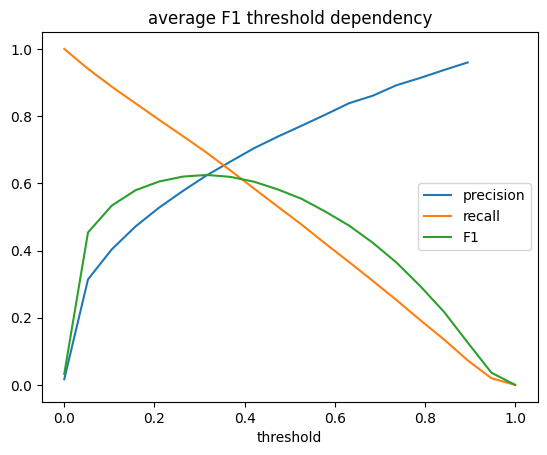

In [ ]:
plt.figure()
plt.plot(thresholds,meanP)
plt.plot(thresholds,meanR)
plt.plot(thresholds,meanF1)
plt.legend(["precision","recall","F1"])
plt.xlabel("threshold")
plt.title("average F1 threshold dependency")
plt.show()

In [ ]:
np.max(meanF1)

0.6249596464634789

In [ ]:
thresholds[np.argmax(meanF1)]

0.3157894736842105

In [ ]:
np.mean(opts)

0.3434903047091413

## By event metrics

In [17]:
experimentModels.head(5)

,train,val,test,modelId,treeLimit,valF1
0,"[0002, 0003, 0004, 0005, 0007, 0008, 0009, 001...","[0006, 0014]",[0001],dfe10db6-0f32-4bce-acc2-f7182342d975,29,0.624040
1,"[0001, 0003, 0004, 0005, 0006, 0007, 0008, 000...","[0012, 0010]",[0002],a9db02e2-0d19-4cb2-8d0f-e403b4d1b817,31,0.560143
2,"[0002, 0004, 0005, 0006, 0007, 0008, 0009, 001...","[0001, 0012]",[0003],41a7a7ab-da20-48bb-9303-f7d8007b8a6e,40,0.373273
3,"[0001, 0003, 0005, 0006, 0008, 0009, 0010, 001...","[0002, 0007]",[0004],ab7f2287-b2cd-4566-bf38-be15170b98b9,31,0.617306
4,"[0001, 0002, 0003, 0004, 0006, 0007, 0008, 000...","[0011, 0016]",[0005],627ce16b-abc2-4ddc-a3d0-66d2fdd180de,29,0.640402


In [18]:
masterThres=0.40
modelMetrics=pd.DataFrame()
allFinalAnnotations={}

for ind, row in experimentModels.iterrows():
    print("******************")
    print(ind)
    
    #model application
    model=loadModel(row.modelId,experimentId,datapath)
    testFeatures=loadFeatureMatrix(row.test,featureSelection,signalsMetadata,samplerate,datapath)
    testLabels=loadLabelsVector(row.test,usedAnnotations,signalsMetadata,samplerate)
    aux=model.predict_proba(testFeatures,iteration_range=(0,masterTreeLimit))[:,1]
    predictedLabels=aux>=masterThres
    raw_F1=F1(testLabels,predictedLabels)

    #process labels
    processedLabels=labelingProcess(predictedLabels,hyperClose,hyperDuration,samplerate)
    finalLabels=processedLabels #<- skip the commented section
    """ #get confidence score and filter
    predictedAnnotations=labelVectorToAnnotations(predictedLabels,samplerate)
    processedAnnotations=labelVectorToAnnotations(processedLabels,samplerate)
    processedAnnotations['confidence']=processedAnnotations.apply(
        lambda row: getConfidence(row,predictedAnnotations)
        ,axis=1)
    finalAnnotations=processedAnnotations[processedAnnotations.confidence>hyperConfidence].copy().reset_index(drop=True)
    finalLabels=excerptAnnotationsToLabels(finalAnnotations,len(testLabels)) """

    tp=np.sum(finalLabels*testLabels)
    fp=np.sum(finalLabels*(1-testLabels))
    tn=np.sum((1-finalLabels)*(1-testLabels))
    fn=np.sum((1-finalLabels)*testLabels)

    vector_Precision=tp/(tp+fp)
    vector_Recall=tp/(tp+fn)
    vector_FPR=fp/(fp+tn)
    vector_F1=2*tp/(2*tp+fp+fn)
    vector_TS=tp/(tp+fn+fp)
    
    #by-event
    finalAnnotations=labelVectorToAnnotations(finalLabels,samplerate)
    gtAnnotations=labelVectorToAnnotations(testLabels,samplerate)   #<- or just filter the annotations
    event_tp,event_fp,event_fn = byEventEvaluation(gtAnnotations,finalAnnotations,thres_IoU=masterIoU)
    #consistency check
    check=event_tp*2+event_fp+event_fn==len(gtAnnotations)+len(finalAnnotations)
    #calculate metrics
    event_F1=2*event_tp/(2*event_tp+event_fp+event_fn)
    event_Precision=event_tp/(event_tp+event_fp)
    event_Recall=event_tp/(event_tp+event_fn)
    event_TS=event_tp/(event_tp+event_fn+event_fp)

    #keep final annotations
    allFinalAnnotations[row.modelId]=finalAnnotations

    #append to the dataframe
    newRow=pd.Series({
        "experimentId":experimentId,
        "modelId":row.modelId,
        "testSubjectId":row.test[0],
        "thres_prob":masterThres,
        "thres_IoU":masterIoU,
        "treeLimit":masterTreeLimit,
        "close":hyperClose,
        "minDuration":hyperDuration,
        "check":check,
        "raw_F1":raw_F1,
        "vector_tp":tp,
        "vector_fp":fp,
        "vector_tn":tn,
        "vector_fn":fn,
        "vector_Precision":vector_Precision,
        "vector_Recall":vector_Recall,
        "vector_FPR":vector_FPR,
        "vector_F1":vector_F1,
        "vector_TS":vector_TS,
        "final_count":len(finalAnnotations),
        "gt_count":len(gtAnnotations),
        "event_F1":event_F1,
        "event_Precision":event_Precision,
        "event_Recall":event_Recall,
        "event_TS":event_TS})
    modelMetrics=pd.concat([modelMetrics,newRow.to_frame().T],ignore_index=True)
    

******************
0
******************
1
******************
2
******************
3
******************
4
******************
5
******************
6
******************
7
******************
8
******************
9
******************
10
******************
11
******************
12
******************
13
******************
14
******************
15
******************
16
******************
17
******************
18


In [19]:
print("event F1 mean: "+str(np.mean(modelMetrics.event_F1)))
print("event F1 std: "+str(np.std(modelMetrics.event_F1)))

event F1 mean: 0.6849454205557103
event F1 std: 0.06629093976882379


In [20]:
print("event Recall mean: "+str(np.mean(modelMetrics.event_Recall)))
print("event Recall std: "+str(np.std(modelMetrics.event_Recall)))

event Recall mean: 0.7529125537330715
event Recall std: 0.15380892961952694


In [21]:
print("event Precision mean: "+str(np.mean(modelMetrics.event_Precision)))
print("event Precision std: "+str(np.std(modelMetrics.event_Precision)))

event Precision mean: 0.6756461507944755
event Precision std: 0.13313577782955813


In [22]:
modelMetrics.head(5)

,experimentId,modelId,testSubjectId,thres_prob,thres_IoU,treeLimit,close,minDuration,check,raw_F1,...,vector_Recall,vector_FPR,vector_F1,vector_TS,final_count,gt_count,event_F1,event_Precision,event_Recall,event_TS
0,caa5287c-cb07-47ff-aba6-9c26eb22c40d,dfe10db6-0f32-4bce-acc2-f7182342d975,0001,0.4,0.3,23,0.25,0.3,True,0.37684,...,0.253136,0.000508,0.398708,0.248991,404,1044,0.513812,0.920792,0.356322,0.345725
1,caa5287c-cb07-47ff-aba6-9c26eb22c40d,a9db02e2-0d19-4cb2-8d0f-e403b4d1b817,0002,0.4,0.3,23,0.25,0.3,True,0.676664,...,0.61862,0.004092,0.701094,0.539757,1108,1143,0.783652,0.796029,0.771654,0.644266
2,caa5287c-cb07-47ff-aba6-9c26eb22c40d,41a7a7ab-da20-48bb-9303-f7d8007b8a6e,0003,0.4,0.3,23,0.25,0.3,True,0.58655,...,0.533688,0.000611,0.606244,0.434971,137,143,0.678571,0.693431,0.664336,0.513514
3,caa5287c-cb07-47ff-aba6-9c26eb22c40d,ab7f2287-b2cd-4566-bf38-be15170b98b9,0004,0.4,0.3,23,0.25,0.3,True,0.617049,...,0.698475,0.003719,0.637601,0.467999,392,253,0.682171,0.561224,0.869565,0.517647
4,caa5287c-cb07-47ff-aba6-9c26eb22c40d,627ce16b-abc2-4ddc-a3d0-66d2fdd180de,0005,0.4,0.3,23,0.25,0.3,True,0.608028,...,0.598887,0.002366,0.629237,0.459042,386,341,0.712517,0.670984,0.759531,0.553419


In [23]:
fig=px.scatter(modelMetrics,x="raw_F1",y="vector_F1",text="testSubjectId")
fig.add_trace(
    go.Scatter(x=modelMetrics['raw_F1'], y=modelMetrics['raw_F1'], name="identity", mode='lines',fill="toself")
)
fig.show()

In [24]:
fig=px.scatter(modelMetrics,x="raw_F1",y="event_F1", marginal_y="histogram",text="testSubjectId")
fig.add_trace(
    go.Scatter(x=modelMetrics['raw_F1'], y=modelMetrics['raw_F1'], name="identity", mode='lines',fill="toself")
)
fig.show()

In [25]:
fig=px.scatter(modelMetrics,x="event_F1",y="event_Precision", marginal_y="histogram",text="testSubjectId")
fig.add_trace(
    go.Scatter(x=modelMetrics['event_F1'], y=modelMetrics['event_F1'], name="slope", mode='lines',fill="toself")
)
fig.show()

In [26]:
fig=px.scatter(modelMetrics,x="event_F1",y="event_Recall", marginal_y="histogram",text="testSubjectId")
fig.add_trace(
    go.Scatter(x=modelMetrics['event_F1'], y=modelMetrics['event_F1'], name="identity", mode='lines',fill="toself")
)
fig.show()

In [27]:
fig=px.scatter(modelMetrics,x="gt_count",y="event_F1", marginal_y="histogram",text="testSubjectId")

fig.show()

In [28]:
fig=px.scatter(modelMetrics,x="gt_count",y="event_Precision", marginal_y="histogram",text="testSubjectId")
fig.show()

In [29]:
fig=px.scatter(modelMetrics,x="gt_count",y="event_Recall", marginal_y="histogram",text="testSubjectId")
fig.show()

In [30]:
aux=modelMetrics.copy()
aux['thres_prob_optimal']=opts

ValueError: Length of values (0) does not match length of index (19)

In [ ]:
aux[aux.testSubjectId.isin(['0001','0015'])]

,experimentId,modelId,testSubjectId,thres_prob,thres_IoU,treeLimit,close,minDuration,check,raw_F1,...,vector_FPR,vector_F1,vector_TS,final_count,gt_count,event_F1,event_Precision,event_Recall,event_TS,thres_prob_optimal
0,caa5287c-cb07-47ff-aba6-9c26eb22c40d,dfe10db6-0f32-4bce-acc2-f7182342d975,0001,0.34,0.3,23,0.25,0.3,True,0.435722,...,0.000687,0.460323,0.298974,478,1044,0.579501,0.922594,0.422414,0.407956,0.052632
14,caa5287c-cb07-47ff-aba6-9c26eb22c40d,f833943c-5fa3-448c-a1a3-c757a5cb1c49,0015,0.34,0.3,23,0.25,0.3,True,0.466368,...,0.000441,0.490266,0.324737,83,97,0.588889,0.638554,0.546392,0.417323,0.210526


In [ ]:
fig=px.scatter(aux,x="thres_prob_optimal",y="event_F1", marginal_y="histogram",text="testSubjectId")
fig.show()

In [ ]:
reported=['0002','0006','0012','0013']

In [ ]:
print("event F1 mean: "+str(np.mean(modelMetrics[modelMetrics.testSubjectId.isin(reported)].event_F1)))
print("event F1 std: "+str(np.std(modelMetrics[modelMetrics.testSubjectId.isin(reported)].event_F1)))

event F1 mean: 0.7127520058337088
event F1 std: 0.04455649984810326


In [ ]:
print("event Recall mean: "+str(np.mean(modelMetrics[modelMetrics.testSubjectId.isin(reported)].event_Recall)))
print("event Recall std: "+str(np.std(modelMetrics[modelMetrics.testSubjectId.isin(reported)].event_Recall)))

event Recall mean: 0.7794780887930006
event Recall std: 0.09527160428849156


In [ ]:
print("event Precision mean: "+str(np.mean(modelMetrics[modelMetrics.testSubjectId.isin(reported)].event_Precision)))
print("event Precision std: "+str(np.std(modelMetrics[modelMetrics.testSubjectId.isin(reported)].event_Precision)))

event Precision mean: 0.6728901340484549
event Precision std: 0.0946730712036972


## Study the sleep stages
as per Tapia and Estevez 2020 states that "N2 epochs from the C3-CLE EEG channel were used because annotated sleep events are available only for this sleep stage and channel", let's look into it

In [31]:
stagesAnnotations=pd.read_csv(datapath+"\MASS\stages\stages.csv")
stagesAnnotations['subjectId']=stagesAnnotations.apply(
    lambda row: str(row.subjectId).zfill(4),axis=1)
stagesAnnotations.head(5)

,subjectId,type,startTime,duration,value,comment
0,0001,stage,560.758313,19.998720,NaN,Sleep stage ?
1,0001,stage,580.758313,20.002626,NaN,Sleep stage ?
2,0001,stage,600.758313,19.998720,NaN,Sleep stage ?
3,0001,stage,620.758313,19.998720,NaN,Sleep stage ?
4,0001,stage,640.758314,20.002626,NaN,Sleep stage ?


In [32]:
stagesAnnotations['stopTime']=stagesAnnotations.apply(
    lambda row: row.startTime+row.duration , axis=1)
stagesAnnotations['startInd']=stagesAnnotations.apply(
    lambda row: seconds2index(row.startTime,samplerate) , axis=1)
stagesAnnotations['stopInd']=stagesAnnotations.apply(
    lambda row: seconds2index(row.stopTime,samplerate) , axis=1)

In [187]:
subjectId='0012'
thisStages=stagesAnnotations[stagesAnnotations.subjectId==subjectId]

In [188]:
aux=signalsMetadata[signalsMetadata.subjectId==subjectId].reset_index(drop=True)
signalLength=aux.duration[0]*aux.samplerate[0]

In [189]:
testLabels=loadLabelsVector([subjectId],usedAnnotations,signalsMetadata,samplerate)

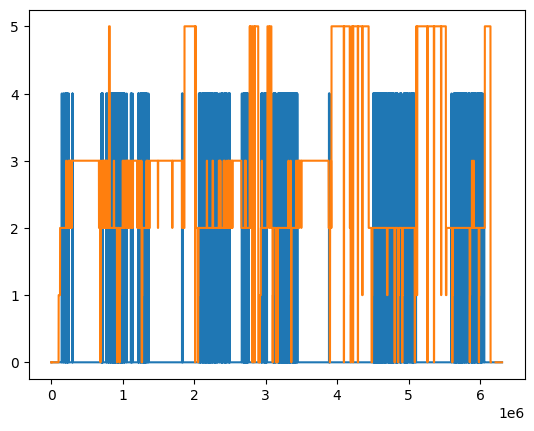

In [190]:
hipnogram=np.zeros((int(signalLength),))
for ind, row in thisStages.iterrows():
    hipnogram[row.startInd:row.stopInd]=row.value
plt.plot(4*testLabels)
plt.plot(hipnogram)
plt.show()

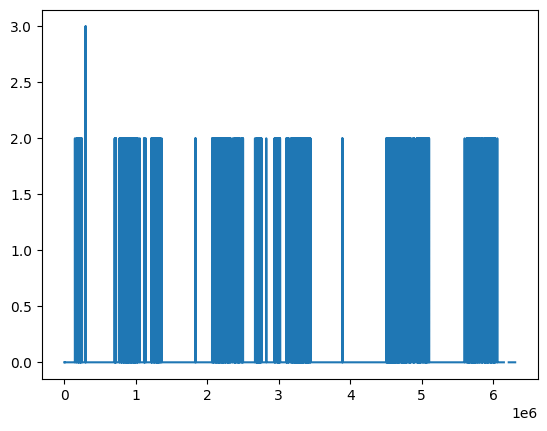

In [202]:
check=testLabels*hipnogram
plt.plot(check)
plt.show()

In [192]:
np.unique(check)

array([ 0.,  2.,  3., nan])

In [193]:
testAnnotations=labelVectorToAnnotations(check==2,samplerate)
len(testAnnotations)

707

In [194]:
uuid=modelMetrics[modelMetrics.testSubjectId==subjectId].reset_index(drop=True).modelId[0]

In [195]:
finalLabels=excerptAnnotationsToLabels(allFinalAnnotations[uuid],len(testLabels))

In [196]:
labelsN2=finalLabels*(hipnogram==2)

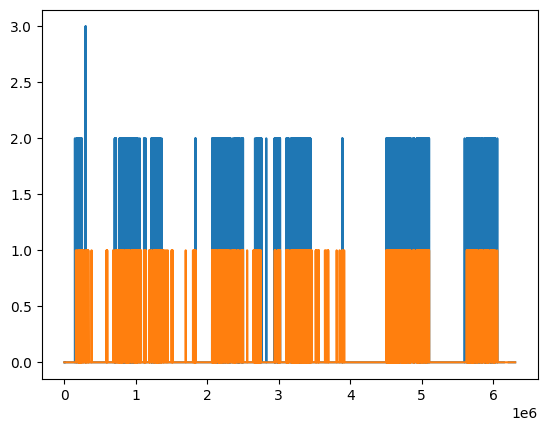

In [216]:
plt.plot(check)
plt.plot(finalLabels)
plt.show()

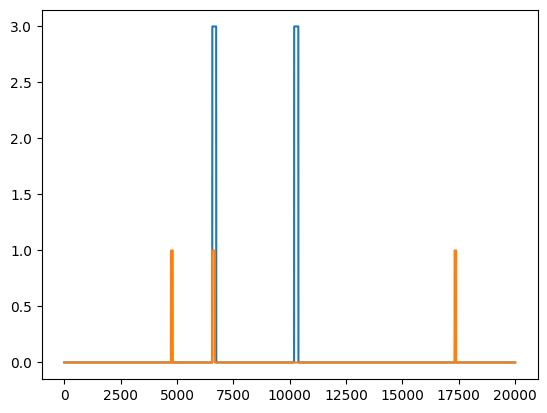

In [217]:
#zoom on the N3 spindles (only 2 on signal 0012)
plt.plot(check[290000:310000])
plt.plot(finalLabels[290000:310000])
plt.show()

In [197]:
annotationsN2=labelVectorToAnnotations(labelsN2,samplerate)
len(annotationsN2)

579

In [198]:
len(allFinalAnnotations[uuid])

664

In [199]:
annotationsN2=annotationsN2[annotationsN2.duration>=hyperDuration].reset_index(drop=True)
annotationsN2

,startInd,stopInd,duration
0,162906,162985,0.395
1,178470,178637,0.835
2,197692,197787,0.475
3,198942,199031,0.445
4,199804,199886,0.410
...,...,...,...
572,6017084,6017154,0.350
573,6019404,6019475,0.355
574,6020038,6020105,0.335
575,6021146,6021231,0.425


In [200]:
gtAnnotations=labelVectorToAnnotations(testLabels,200)

event_tp,event_fp,event_fn = byEventEvaluation(gtAnnotations,annotationsN2,thres_IoU=0.3)
#consistency check
check=event_tp*2+event_fp+event_fn==len(gtAnnotations)+len(annotationsN2)
#calculate metrics
event_F1=2*event_tp/(2*event_tp+event_fp+event_fn)
event_Precision=event_tp/(event_tp+event_fp)
event_Recall=event_tp/(event_tp+event_fn)
event_TS=event_tp/(event_tp+event_fn+event_fp)

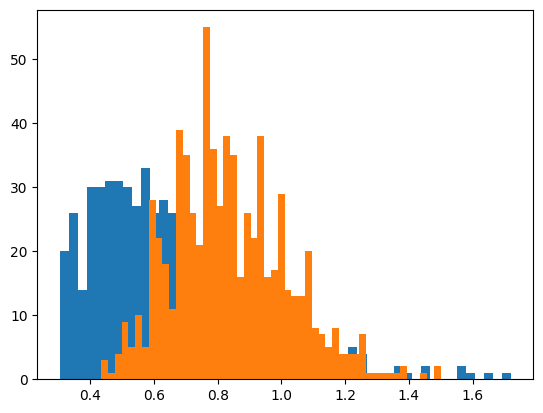

In [221]:
plt.hist(annotationsN2.duration,bins=50)
plt.hist(gtAnnotations.duration,bins=50)
plt.show()

In [175]:
event_F1

0.7527216174183515

In [176]:
event_Precision

0.8388214904679376

In [177]:
event_Recall

0.6826516220028209

In [178]:
event_tp

484

In [179]:
event_fp

93

In [180]:
event_fn

225

In [119]:
modelMetrics

,experimentId,modelId,testSubjectId,thres_prob,thres_IoU,treeLimit,close,minDuration,check,raw_F1,...,vector_Recall,vector_FPR,vector_F1,vector_TS,final_count,gt_count,event_F1,event_Precision,event_Recall,event_TS
0,caa5287c-cb07-47ff-aba6-9c26eb22c40d,dfe10db6-0f32-4bce-acc2-f7182342d975,0001,0.4,0.3,23,0.25,0.3,True,0.37684,...,0.253136,0.000508,0.398708,0.248991,404,1044,0.513812,0.920792,0.356322,0.345725
1,caa5287c-cb07-47ff-aba6-9c26eb22c40d,a9db02e2-0d19-4cb2-8d0f-e403b4d1b817,0002,0.4,0.3,23,0.25,0.3,True,0.676664,...,0.61862,0.004092,0.701094,0.539757,1108,1143,0.783652,0.796029,0.771654,0.644266
2,caa5287c-cb07-47ff-aba6-9c26eb22c40d,41a7a7ab-da20-48bb-9303-f7d8007b8a6e,0003,0.4,0.3,23,0.25,0.3,True,0.58655,...,0.533688,0.000611,0.606244,0.434971,137,143,0.678571,0.693431,0.664336,0.513514
3,caa5287c-cb07-47ff-aba6-9c26eb22c40d,ab7f2287-b2cd-4566-bf38-be15170b98b9,0004,0.4,0.3,23,0.25,0.3,True,0.617049,...,0.698475,0.003719,0.637601,0.467999,392,253,0.682171,0.561224,0.869565,0.517647
4,caa5287c-cb07-47ff-aba6-9c26eb22c40d,627ce16b-abc2-4ddc-a3d0-66d2fdd180de,0005,0.4,0.3,23,0.25,0.3,True,0.608028,...,0.598887,0.002366,0.629237,0.459042,386,341,0.712517,0.670984,0.759531,0.553419
5,caa5287c-cb07-47ff-aba6-9c26eb22c40d,b01595be-85b5-4126-b4e2-151196a40974,0006,0.4,0.3,23,0.25,0.3,True,0.556401,...,0.545868,0.00123,0.587983,0.416413,180,150,0.660606,0.605556,0.726667,0.493213
6,caa5287c-cb07-47ff-aba6-9c26eb22c40d,1238a54b-ecc1-4241-8048-39e95efd0470,0007,0.4,0.3,23,0.25,0.3,True,0.587179,...,0.766417,0.024603,0.590203,0.418644,1679,912,0.627557,0.484217,0.891447,0.457255
7,caa5287c-cb07-47ff-aba6-9c26eb22c40d,f6994485-50f9-4be9-9122-f7c45f2626d8,0008,0.4,0.3,23,0.25,0.3,True,0.609326,...,0.54863,0.002487,0.626691,0.456337,378,385,0.710354,0.716931,0.703896,0.550813
8,caa5287c-cb07-47ff-aba6-9c26eb22c40d,d080e719-2c7b-453c-921f-84d45d827dd0,0009,0.4,0.3,23,0.25,0.3,True,0.546671,...,0.419569,0.001037,0.574882,0.403393,545,814,0.715232,0.891743,0.597052,0.556701
9,caa5287c-cb07-47ff-aba6-9c26eb22c40d,de6a9e0d-8a5b-4e8e-8fb2-10a2e7ae9f16,0010,0.4,0.3,23,0.25,0.3,True,0.647473,...,0.615996,0.005766,0.669226,0.502885,896,795,0.756949,0.714286,0.805031,0.608944
